In [1]:
# import library
import numpy as np # library untuk komputasi matematis
import matplotlib.pyplot as plt # library untuk visualisasi data
from scipy import stats
import seaborn as sns

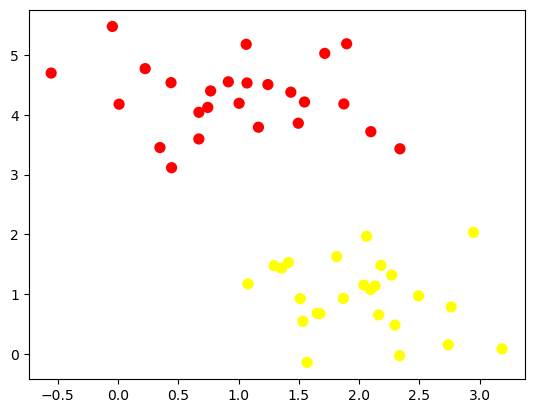

In [2]:
from sklearn.datasets import make_blobs # import library yang digunakan untuk membuat kluster data gaussian
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60) # membuat dua kluster data 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # membuat visualisasi scatter plot dari kluster data yang telah dibuat

(-1.0, 3.5)

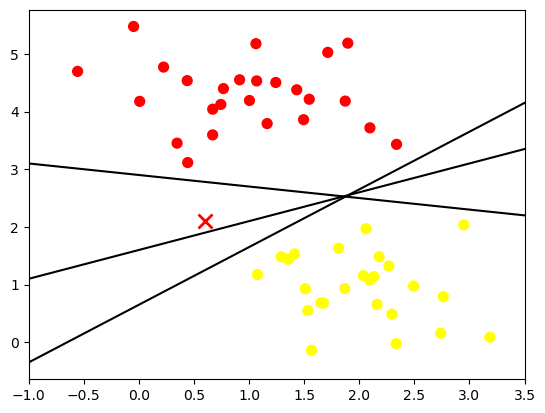

In [3]:
xfit = np.linspace(-1, 3.5) # menggunakan numpy untuk membuat arry 1d berisi angka-angka yang berjarak sama antara -1 sampai 3.5
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # visualisasi kluster data yang tadi
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10) # membuat tanda x pada posisi (0.6, 2.1)

# membuat visualisasi garis hperplane berdasarkan beberapa titik
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5) # membatasi axis x pada histogram

(-1.0, 3.5)

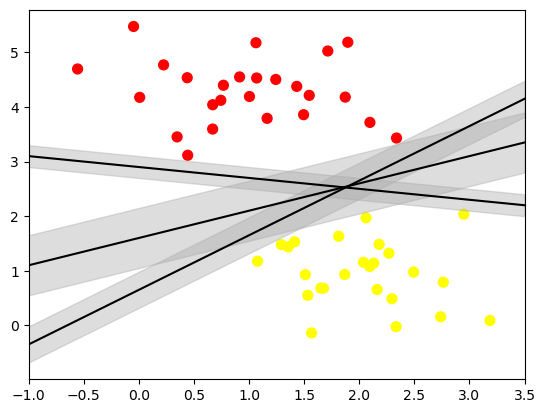

In [4]:
xfit = np.linspace(-1, 3.5) # menggunakan numpy untuk membuat arry 1d berisi angka-angka yang berjarak sama antara -1 sampai 3.5
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # visualisasi kluster data yang tadi

# membuat visualisasi garis hyperplane berdasarkan beberapa titik dan margin untuk tiap garis support
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import SVC # import library svm klasifikasi
model = SVC(kernel='linear', C=1E10) # instansiasi model svm dengan kernel linear
model.fit(X, y) # melatih model dengan data yang ada beserta labelnya

SVC(C=10000000000.0, kernel='linear')

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    # membuat tempat grafik atau plot
    if ax is None:
        ax = plt.gca()
    # mencari batas dari plot
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # membuat grid berdasarkan reta-rata interval antar titik
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # menghitung jarak tiap titik ke hyperplane
    P = model.decision_function(xy).reshape(X.shape)
    
    # membuat plot hyperplane dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # membuat plot support vector
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    # membatasi axis pada histogram sesuai dengan kebutuhan
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

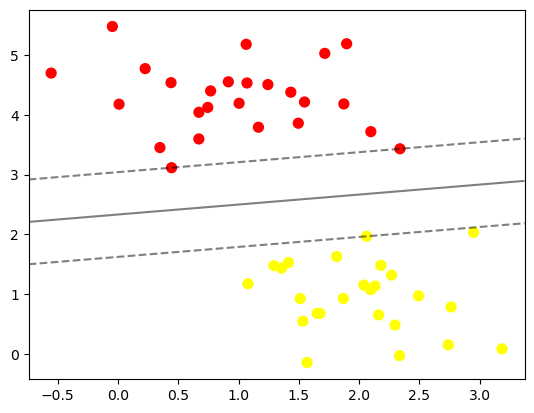

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [8]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

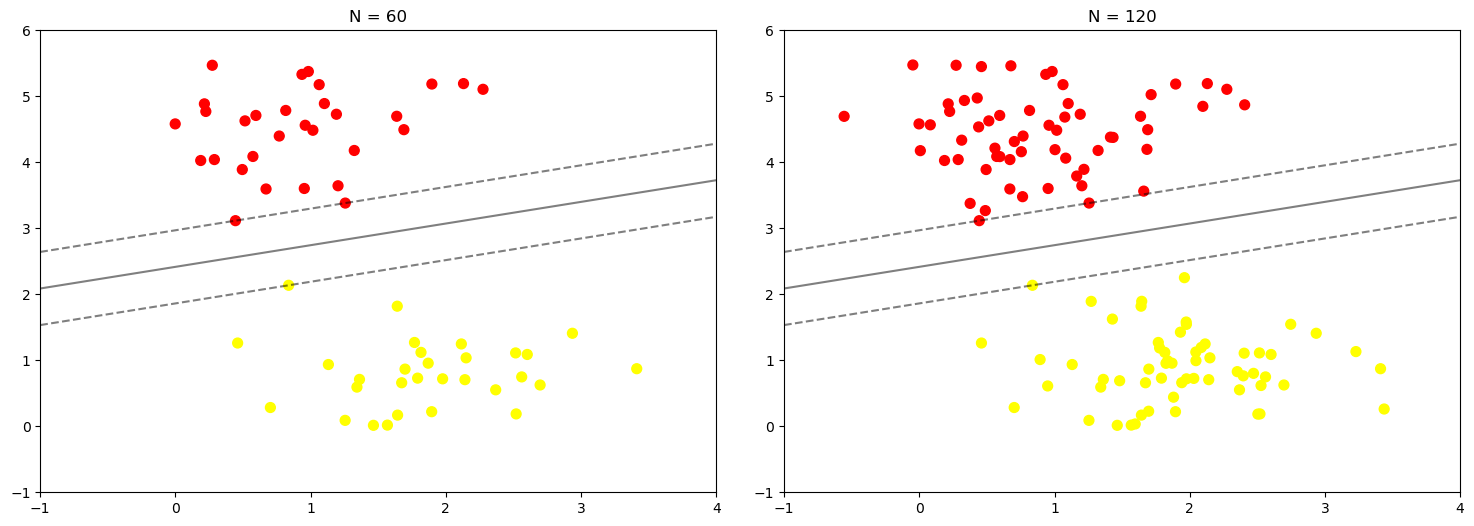

In [9]:
def plot_svm(N=10, ax=None):
    # membuat dua kluster data dengan 200 titik
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    # membuat dan melatih model svc dengan kernel linear dan parameter c sangat besar
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca() # membuat axes matplotlib
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # visualisasi dua kluster data
    # memberikan batas pada tiap kluster
    ax.set_xlim(-1, 4) 
    ax.set_ylim(-1, 6)
    # visualisasi batas keputusan(jarak ke hyperplane = 0) dan margin(jarak support vector ke hyperplane)
    plot_svc_decision_function(model, ax)

# mendeklarasikan dua subplot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# menampilkan dua plot svm dengan masing-masing 60 dan 120 sample data
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

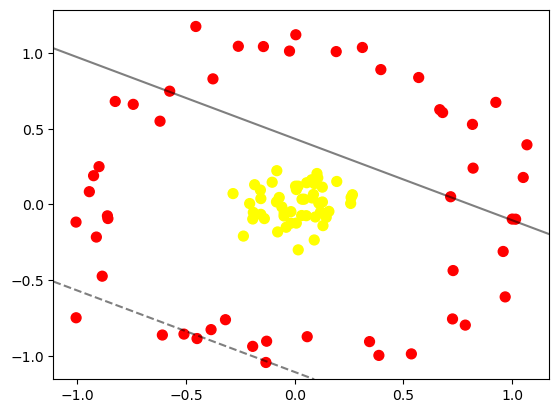

In [10]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles # import package untuk membuat dataset dengan plot berbentuk lingkaran
X, y = make_circles(100, factor=.1, noise=.1) # membuat dua kluster data lingkaran dengan skala 0.1 antara kedua lingkaran

clf = SVC(kernel='linear').fit(X, y) # membuat dan melatih model svc

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # menampilkan plot kedua data
plot_svc_decision_function(clf, plot_support=False); # visualisasi batas keputusan tanpa support vector

In [11]:
r = np.exp(-(X ** 2).sum(1))

In [12]:
# import library yang digunakan untuk visualisasi data dalam 3 dimensi
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

# menampilkan kedua kluster data dalam 3 dimensi
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.1273544 ,  0.01634996],
       [-0.18419576,  0.13075367],
       [-0.0711393 ,  0.04636622],
       [-0.04910125, -0.0758431 ],
       [ 0.5363244 , -0.98766696],
       [ 0.12687553,  0.11466332],
       [ 0.82002579,  0.2402682 ],
       [ 0.01578865,  0.1212189 ],
       [ 0.39603539,  0.89167524],
       [-0.12905431, -0.90392491],
       [ 0.15720573, -0.04564986],
       [-0.15592739, -0.06519508],
       [ 0.05747399, -0.87403271],
       [ 0.09092258,  0.13790787],
       [ 0.04309557,  0.03487856],
       [-0.858671  , -0.09279068],
       [ 0.11894618, -0.04872045],
       [ 0.00768515,  0.09888283],
       [-0.04850609, -0.05666398],
       [ 0.00396438,  0.12100467],
       [ 0.2573733 ,  0.0068439 ],
       [-0.283443  ,  0.07200176],
       [ 0.03196831, -0.07302363],
       [-0.50903618, -0.85689008],
       [ 0.05501661,  0.14375051],
       [-0.13228968, -1.04447181],
       [-1.00479758, -0.74894979],
       [

In [13]:
clf = SVC(kernel='rbf', C=1E6) # membuat model svc dengan kernel rbf dan nilai c yang kecil untuk mentolerir nilai kesalahan yang kecil
clf.fit(X, y) # melatih model

SVC(C=1000000.0)

In [14]:
SVC(C=1000000.0)

SVC(C=1000000.0)

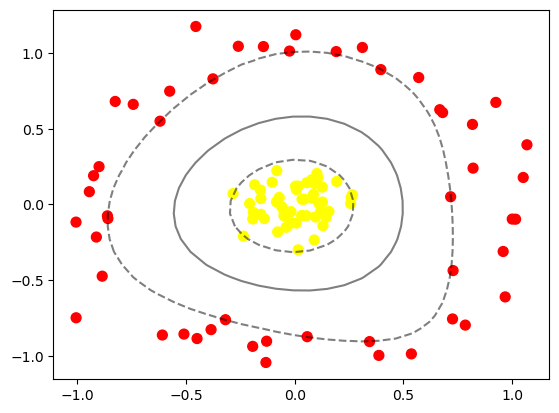

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # menampilkan plot kedua data
plot_svc_decision_function(clf) # membuat visualisasi plot batas keputusan dan margin
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none') # membuat plot dari support vector

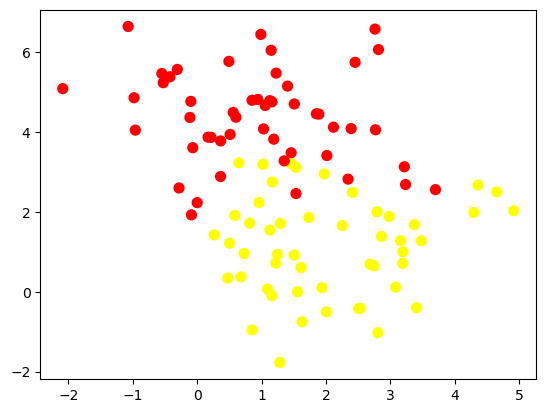

In [16]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2) # membuat dua kluster data dengan 100 sample dan 1.2 standard deviasi
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'); # menampilkan plot kedua kluster data

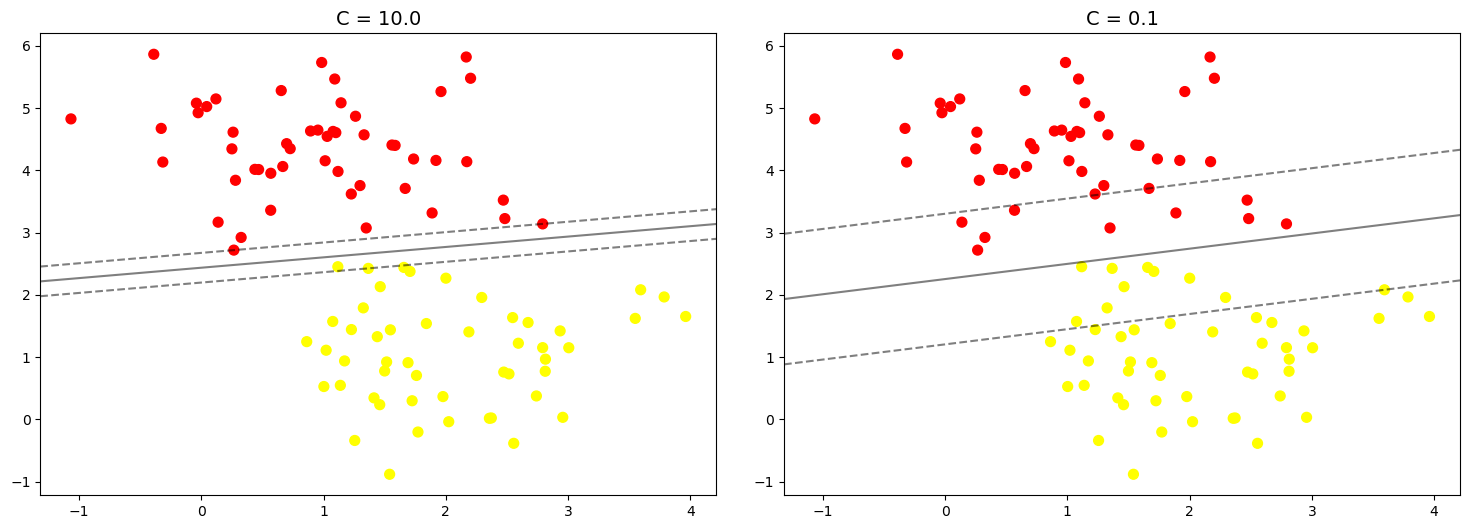

In [17]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8) # membuat dua kluster data dengan 100 sample dan 0.8 standard deviasi

fig, ax = plt.subplots(1, 2, figsize=(16, 6)) # mendeklarasikan dua subplot
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y) # membuat dan melatih model svc dengan kernel linear
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # menampilkan plot kedua kluster data
    plot_svc_decision_function(model, axi) # menentukan nilai batas keputusan dan margin
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none'); # menampilkan plot support vector
    axi.set_title('C = {0:.1f}'.format(C), size=14)